In [1]:
import sys
workPath = '/home/jovyan/workspace'
if not workPath in sys.path:
    sys.path.append(workPath)

In [2]:
import numpy as np

import planetengine
import everest

In [3]:
frameID = 'MS98test'
outputPath = '../out/test'
# myfile = h5py.File(os.path.join(outputPath, frameID) + '.frm')

In [4]:
system1 = planetengine.systems.isovisc.build(
    res = 16,
    Ra = 1e5,
    f = 1.
    )
system1.go(10)
system1.store()
system1.anchor(frameID, outputPath)
system1.save()

Variable{8789816835581}



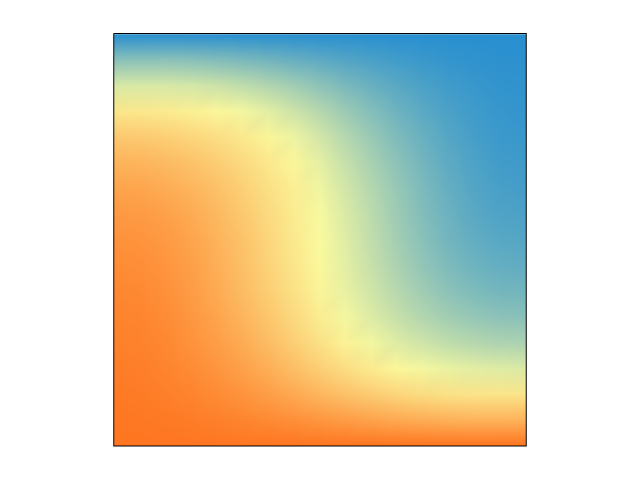

In [5]:
planetengine.quickShow(system1.locals.temperatureField)

In [6]:
IC = planetengine.initials.load.build(system1, 'temperatureField')
system2 = planetengine.systems.MS98.build(
    res = 32,
    Ra = 1e7,
    aspect = 2.,
    f = 0.5,
    _initial_temperatureField = IC
    )
# system2.store()
# preSystem.go(10)

Variable{-9223363247053072398}



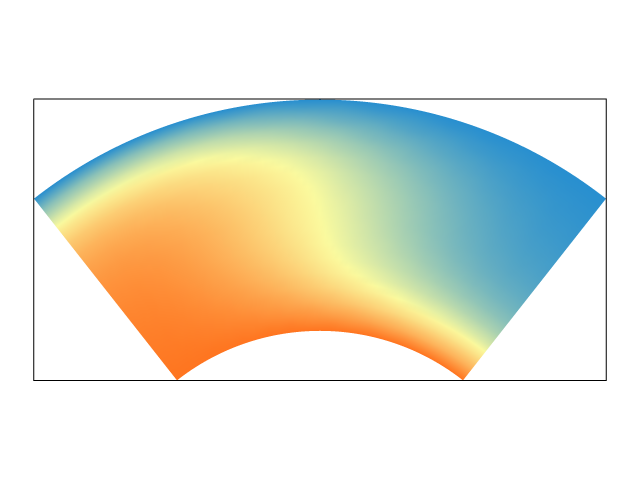

In [7]:
planetengine.quickShow(system2.locals.temperatureField)

In [8]:
IC.anchor(frameID, outputPath)

In [9]:
system1.hashID

'oreutraeta-snuispuani'

In [10]:
loaded_IC = everest.built.load(frameID, IC.hashID, outputPath)
system3 = planetengine.systems.MS98.build(
    res = 32,
    Ra = 1e7,
    aspect = 2.,
    f = 0.5,
    _initial_temperatureField = loaded_IC
    )

Variable{-9223363247053118485}



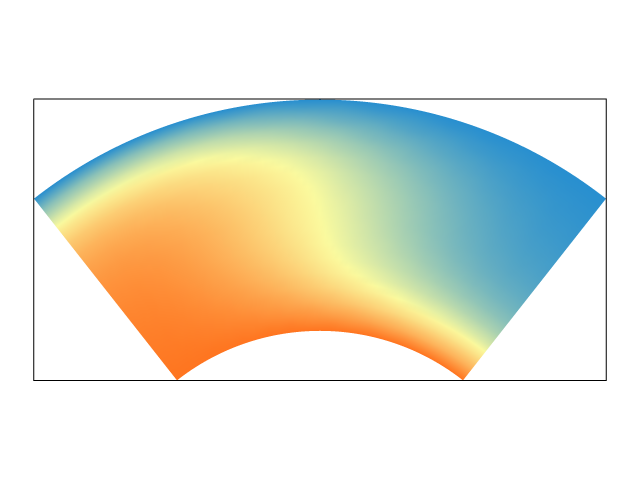

In [11]:
planetengine.quickShow(system3.locals.temperatureField)

In [12]:
assert np.allclose(system2.locals.temperatureField.data, system3.locals.temperatureField.data)
assert loaded_IC.hashID == IC.hashID
assert system3.hashID == system2.hashID

In [13]:
myfile = loaded_IC.file()

In [14]:
system1.hashID

'oreutraeta-snuispuani'

In [15]:
system2.hashID

'exeispoaga-ospaafuoblo'

In [16]:
system3.hashID

'exeispoaga-ospaafuoblo'

In [17]:
IC.hashID

'dwiimisle-etriseuzi'

In [18]:
loaded_IC.hashID

'dwiimisle-etriseuzi'

In [19]:
myfile.keys()

<KeysViewHDF5 ['dwiimisle-etriseuzi', 'oreutraeta-snuispuani', 'oxiavuitru-apreismeete']>

In [20]:
loaded_IC.inputs['system']

In [21]:
IC.inputs

{'count': 10,
 'system': <planetengine.systems.isovisc.Isovisc at 0x7fe89e8fdba8>,
 'varName': 'temperatureField'}

In [22]:
myfile.close()

In [23]:
import shutil
import os
if os.path.exists(outputPath):
    shutil.rmtree(outputPath)